In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [28]:
data = pd.read_csv('data_owid_16AUGUST.csv')

In [29]:
beginning_vaccination = -240
beginning_infection = -502

In [30]:
countries = ['Brazil', 'France', 'Germany', 'Israel', 'United Kingdom', 'United States']
dates_infection = list(data[data['location'] == 'France']['date'][beginning_infection:])
dates_vaccination = list(data[data['location'] == 'France']['date'][beginning_vaccination:])

In [25]:
data = data.fillna(method = 'ffill')

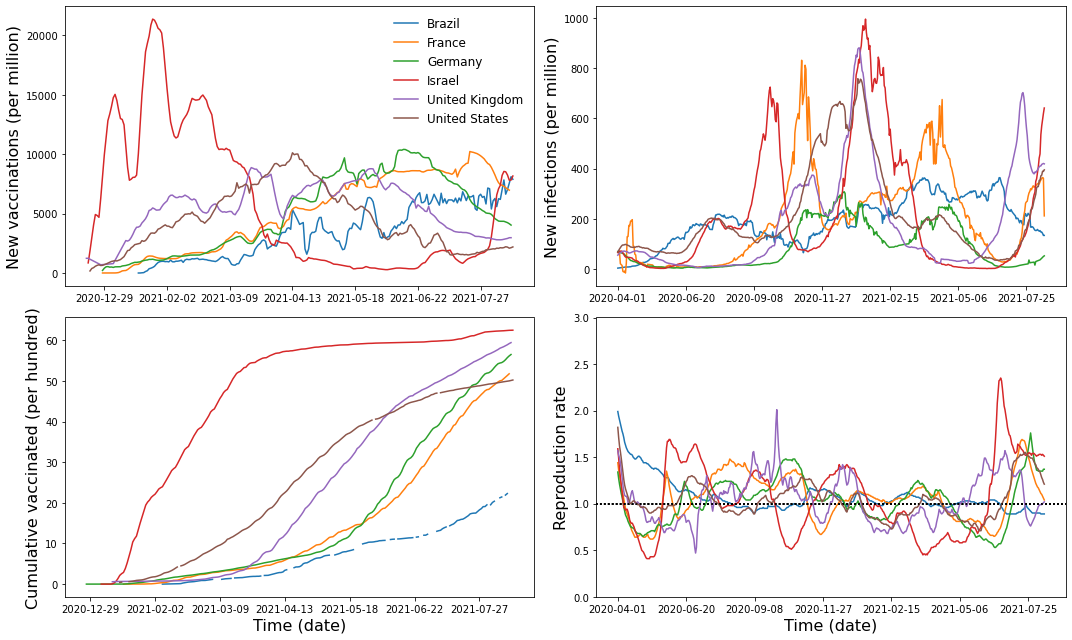

In [31]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

for country in countries:
    vaccinations = data[data['location'] == country]['people_fully_vaccinated_per_hundred'][beginning_vaccination:]
    vaccinations_per_day = data[data['location'] == country]['new_vaccinations_smoothed_per_million'][beginning_vaccination:]
    ax[0,0].plot(dates_vaccination, vaccinations_per_day)
    ax[1,0].plot(dates_vaccination, vaccinations)
    ax[0,1].plot(dates_infection, data[data['location'] == country]['new_cases_smoothed_per_million'][beginning_infection:])
    ax[1,1].plot(dates_infection, data[data['location'] == country]['reproduction_rate'][beginning_infection:])
    ax[1,1].axhline(1, c = 'k', linestyle = 'dotted')
    
for i in range(2):
    ax[i,0].set_xticks(np.arange(10,len(dates_vaccination),35))
    ax[i,1].set_xticks(np.arange(0,len(dates_infection),80))
    
    
ax[0,0].legend(['Brazil', 'France', 'Germany', 'Israel', 'United Kingdom', 'United States'], fontsize = 12, frameon=False)
ax[0,0].set_ylabel('New vaccinations (per million)', fontsize = 16)
ax[1,0].set_ylabel('Cumulative vaccinated (per hundred)', fontsize = 16)
ax[1,1].set_ylabel('Reproduction rate', fontsize = 16)
ax[0,1].set_ylabel('New infections (per million)', fontsize = 16)
ax[1,1].set_xlabel('Time (date)', fontsize = 16)
ax[1,0].set_xlabel('Time (date)', fontsize = 16)
ax[1,1].set_ylim(0,3)


plt.tight_layout()
plt.savefig('Figure1_SEPT14.jpg', dpi = 400)

In [25]:
israel_data = data[data['location'] =='Israel']
usa_data = data[data['location'] =='United States']

In [68]:
vax_data_israel = np.diff(israel_data['people_fully_vaccinated'])/8.655541
vax_data_israel = np.nan_to_num(vax_data_israel, 0)
vax_data_usa = np.diff(usa_data['people_fully_vaccinated'])/331
vax_data_usa = np.nan_to_num(vax_data_usa, 0)

In [72]:
with open('vaccination_data.txt', 'wb') as f:
    pickle.dump({'usa':vax_data_usa, 'israel':vax_data_israel}, f)